# MATH 210 Introduction to Mathematical Computing

## March 23, 2022

* Order of accuracy
* Midpoint method
* Second order equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Order of accuracy

We say that a numerical method has **order** $p$ if, for any equation $y'=f(t,y)$, $y(t_0)=y_0$, the local truncation error $E_{\mathrm{local}}(h) = |y(t_t) - y_1|$ satisfies

$$
E_{\mathrm{local}}(h) \leq C h^{p+1}
$$

How do we determine the order of a method? We can prove it like we did for Euler's method. But for other methods it is quite difficult to prove. Instead, we can determine the order numerically by plotting $\log(E)$ versus $\log(h)$ for the equation $y'=y$, $y(0)=1$. The slope is $p+1$ where $p$ is the order.

## Midpoint method

Let $y'=f(t,y)$, $y(t_0)=y_0$. The midpoint method computes a $y$ value at $t_n + h/2$ using Euler's method, computes the slope there and then uses that to approximate $y_{n+1}$.

\begin{align*}
h & = t_{n+1} - t_n \\
k_1 &= f(t_n,y_n) \\
k_2 &= f(t_n + h/2, y_n + k_1 h/2) \\
y_{n+1} &= y_n + k_2 h
\end{align*}

In [2]:
def odeMidpoint(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n] + h/2, y[n] + k1*h/2)
        y[n+1] = y[n] + k2*h
    return y

Test our function on an example where we know the exact solution:

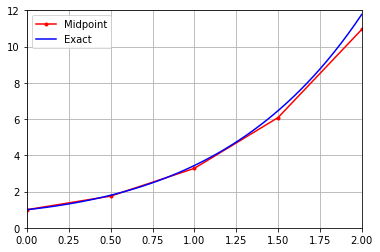

In [3]:
f = lambda t,y: t+y
tf = 2; t = np.linspace(0,tf,5);
y0 = 1
y = odeMidpoint(f,t,y0)
t_exact = np.linspace(0,tf,50);
y_exact = (y0 + 1)*np.exp(t_exact) - t_exact - 1
plt.plot(t,y,'r.-',t_exact,y_exact,'b')
plt.grid(True), plt.ylim([0,12]), plt.xlim([0,tf]),plt.legend(['Midpoint','Exact'])
plt.show()

What is the order of the midpoint method?

Consider $y'=y$, $y(0)=1$. Compute the approximation and error $E_1$ for $h_1=0.01$.

In [5]:
f = lambda t,y: y
h1 = 0.01
y = odeMidpoint(f,[0,h1],1)
E1 = np.abs(y[1] - np.exp(h1))
E1

1.6708416805677473e-07

Compute the approximation and error $E_2$ for $h_2=0.001$.

In [6]:
f = lambda t,y: y
h2 = 0.001
y = odeMidpoint(f,[0,h2],1)
E2 = np.abs(y[1] - np.exp(h2))
E2

1.667084248424544e-10

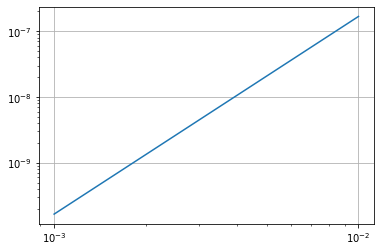

In [7]:
plt.loglog([h1,h2],[E1,E2]), plt.grid(True)
plt.show()

The midpoint method is order 2 since the plot has slope 3. In other words, to find the order of a method, compute $E_1$ and $E_2$ for step sizes $h_1$ and $h_2$ applied to $y'=y$, $y(0)=1$, then compute

$$
p+1 \approx \frac{\log(E_2) - \log(E_1)}{\log(h_2) - \log(h_1)}
$$

In [8]:
(np.log(E2) - np.log(E1))/(np.log(h2) - np.log(h1)) - 1

2.000977752514522

## Second order equations

Consider second order constant coefficient equation

$$
ay'' + by' + cy = f(t) \ \ , \ y(t_0)=y_0 \ , \ y'(t_0) = v_0
$$

How do we approximate the solution $y(t)$? How do we use Euler's method to approximate $y(t)$? Apply Euler's method twice: once for position $y(t)$ and once for velocity $y'(t)$.

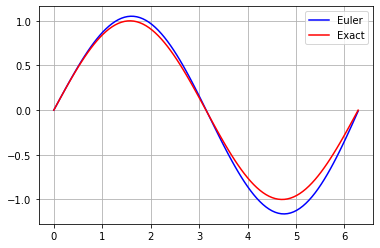

In [9]:
# y'' + y = 0 , y(0)=0 , y'(0)=1
a = 1; b = 0; c = 1; f = lambda t: 0;
y0 = 0; v0 = 1;
t = np.linspace(0,2*np.pi,100);
y = np.zeros(len(t))
y[0] = y0
v = np.zeros(len(t))
v[0] = v0

for n in range(0,len(t)-1):
    h = t[n+1] - t[n]
    y[n+1] = y[n] + v[n]*h
    v[n+1] = v[n] + (f(t[n]) - b*v[n] - c*y[n])/a*h

plt.plot(t,y,'b',t,np.sin(t),'r')
plt.legend(['Euler','Exact']), plt.grid(True)
plt.show()

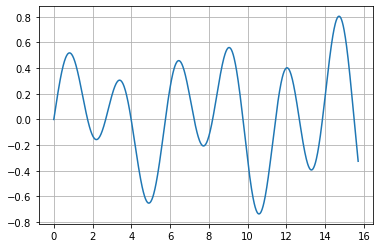

In [10]:
a = 1; b = 0; c = 5; f = lambda t: np.sin(t);
y0 = 0; v0 = 1;
t = np.linspace(0,5*np.pi,1000);
y = np.zeros(len(t))
y[0] = y0
v = np.zeros(len(t))
v[0] = v0

for n in range(0,len(t)-1):
    h = t[n+1] - t[n]
    y[n+1] = y[n] + v[n]*h
    v[n+1] = v[n] + (f(t[n]) - b*v[n] - c*y[n])/a*h

plt.plot(t,y), plt.grid(True)
plt.show()